# <b><center> Social Networks EDA </b></center>


## Entendimiento de los Datos:

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re
from difflib import SequenceMatcher

## <u>Leer los datos que en el nombre contienen un mes:</u></br>
### <b>Instagram:</b>

Cargar los 12 archivos que en el nombre tienen un mes, en 3  DataFrames, uno de cada red social, donde cada uno de los cuales debe contener las siguientes columnas:

Instagram:
* Username
* Name
* Subscribers o Followers
* Country
* Authentic
* Engagement
* Category1
* Category2
* Month

In [157]:
ig_june = (
    pd.read_csv('DATA/instagramjune2022.csv')
    .assign(Month='June')
    .rename(columns={
        "instagram name": "username",
        "influencer name ":"name",
        "Category_1": "category1",
        "Category_2": "category2",
        "Subscribers count": "followers",
        "Views avg.": "country",
        "Likes avg": "authentic",
        "Comments avg.": "average",
        "Month": "month"})
)
ig_june.country = ig_june.country.apply(lambda x: np.nan if re.search(r'\d', str(x)) else str(x))

In [158]:
ig_sep = (
    pd.read_csv('DATA/instagramsep2022.csv')
    .assign(Month='September')
    .rename(columns={
        "Instagram name": "username",
        " Name": "name",
        "Subscribers": "followers",
        "Audience country": "country",
        "Authentic engagement\n": "authentic",
        "Engagement average\r\n": "average",
        "Category_1": "category1",
        "Category_2": "category2",
        "Month": "month"})
    .drop('S.no', axis=1)
)

In [159]:
ig_nov = (
    pd.read_csv('DATA/instagramNov2022.csv')
    .assign(Month='November')
    .drop('s.no', axis=1)
    .rename(columns={
        "Name": "username",
        "Instagram Name": "name",
        "Category-1": "category1",
        "Followers": "followers",
        "\nCountry": "country",
        "Eng. (Auth.)": "authentic",
        "Eng. (Avg.)": "average",
        "Category-2": "category2",
        "Month": "month"})
)

In [160]:
ig_dec = (
    pd.read_csv('DATA/INSTAGRAMDEC2022.csv')
    .assign(Month='December')
    .rename(columns={
        "name": "username",
        "instagram name": "name",
        "Category_1": "category1",
        "Category_2": "category2",
        "Eng. (Auth.)": "authentic",
        "Eng. (Avg.)": "average",
        "Month": "month"})
)

In [52]:
ig_june.isna().sum()

username       0
name          26
category1     95
category2    724
followers      0
country        0
authentic      0
average       16
month          0
dtype: int64

Definiendo una función que transforma los números de texto a int en todo una columna

In [161]:
def cientific_int(column: pd.Series) -> pd.Series:
    return (
        column
        .fillna('0')
        .replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True)
        .map(pd.eval)
        .astype(int)
        .replace(0, np.nan)
    )

numeric_text_cols = ['followers', 'average', 'authentic']

In [162]:
ig_june.loc[:, numeric_text_cols] = ig_june[numeric_text_cols].apply(cientific_int)
ig_sep.loc[:, numeric_text_cols] = ig_sep[numeric_text_cols].apply(cientific_int)
ig_nov.loc[:, numeric_text_cols] = ig_nov[numeric_text_cols].apply(cientific_int)
ig_dec.loc[:, numeric_text_cols] = ig_dec[numeric_text_cols].apply(cientific_int)

/tmp/ipykernel_2465/3766823224.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ig_dec.loc[:, numeric_text_cols] = ig_dec[numeric_text_cols].apply(cientific_int)


ig_months es la combinación de todos los meses, eliminando aquellos registros duplicados.
Tener cuidado con los datos numéricos, ya que son datos incompletos. Para sacar promedios se tiene que considerar los df por separado

In [163]:
ig_months = (
    pd.concat([ig_june, ig_sep, ig_nov, ig_dec], ignore_index=True)
    .drop("Rank", axis=1)
    .drop_duplicates()
)

Verificando duplicados

In [164]:
ig_months.duplicated().sum()

0

### TikTok:

In [165]:
tt_june = pd.read_csv('DATA/tiktokjune2022.csv')
tt_june = tt_june.assign(Month='June')
tt_june.head(1)

,Tiktoker,influencer name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,Month
0,___nicoichi___,NICO【平成フラミンゴ】,1.3M,1.9M,225.3K,1.7K,1.1K,June


In [166]:
tt_sep= pd.read_csv('DATA/Tiktoksep2022.csv')
tt_sep = tt_sep.assign(Month='September')
tt_sep.head(1)

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Month
0,1,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September


In [167]:
tt_nov= pd.read_csv('DATA/tiktoknov2022.csv')
tt_nov = tt_nov.assign(Month='November')
tt_nov.head(1)

,row-cell,Tiktoker name,Tiktok name,\nFollowers,Views (Avg.),Likes (Avg.),Comments (Avg.),Shares (Avg.),Month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,November


In [168]:
tt_dec= pd.read_csv('DATA/TIKTOKDEC2022.csv')
tt_dec = tt_dec.assign(Month='December')
tt_dec.head(1)

,Rank,Tiktoker name,Tiktok name,followers,views(avg),likes(avg.),comments(avg.),shares(avg.),Month
0,1,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December


### Youtube:

In [169]:
y_june= pd.read_csv('DATA/youtubejune2022.csv')
y_june = y_june.assign(Month='June')
y_june.head(1)

,channel name,youTuber,Category,Category_2,Subscribers count,Country,Views avg.,Likes avg,Comments avg.,Month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',June


In [170]:
y_sep= pd.read_csv('DATA/Youtubesep2022.csv')
y_sep = y_sep.assign(Month='September')
y_sep.head(1)

,S.no,Name,Youtuber,Country,Subscribers,Category_2,Avg. views\r\n,Avg. likes,Avg Comments,Category_3,Month
0,1,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,September


In [171]:
y_nov= pd.read_csv('DATA/youtubenov2022.csv')
y_nov = y_nov.assign(Month='November')
y_nov.head(1)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,November


In [172]:
y_dec= pd.read_csv('DATA/YOUTUBEDEC2022.csv')
y_dec = y_dec.assign(Month='December')
y_dec.head(1)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,December


TikTok:
* Username
* Name
* Followers o Suscribers
* Views
* Likes
* Comments
* Shares
* Month

Youtube:
* Username
* Name
* Country
* Suscribers o Folowers
* Views
* Likes
* Comments
* Category1
* Category2
* Month

# Análisis instagram

### Número total de cuentas distintas en instagram: 2409

In [173]:
ig_months.username.drop_duplicates().size

1384

### Media de seguidores
Calcular el promedio de seguidores, authentic, engagement, de cada cuenta. Es decir, cada red social cuenta con 4 archivos de 4 meses distintos, si una cuenta aparece en los 4 meses, debera calcular el promedio de esos 4 meses, si una cuenta solo aparece 2 meses, se hara el promedio de esos dos meses y asi sucesivamente. SI el valor es nulo, vacio, N/A, o 0 no se debe promediar.

In [174]:
ig_means = (
    ig_months
    .groupby('username')
     # aggregate functiosn skips nan by deffault
    .aggregate({
        'followers': 'mean',
        'authentic': 'mean',
        'average': 'mean'
    })    
    .reset_index()
    .sort_values('followers', ascending=False)
)

### Metricas de Valor

Metricas de Valor de cada cuenta. Para este punto debe utilizar los promedios del punto anterior: Promedio Engagement/Promedio Followers.

In [175]:
ig_means['engagement_ratio'] = ig_means.average / ig_means.followers

In [176]:
ig_means

,username,followers,authentic,average,engagement_ratio
536,instagram,5.497500e+08,310825.0,3.849750e+05,0.000700
270,cristiano,4.858000e+08,6575000.0,8.175000e+06,0.016828
740,leomessi,3.669750e+08,7100000.0,9.325000e+06,0.025410
709,kyliejenner,3.667750e+08,2950000.0,4.700000e+06,0.012814
1130,selenagomez,3.469500e+08,1750000.0,2.300000e+06,0.006629
...,...,...,...,...,...
394,feat.dino,2.700000e+06,716600.0,8.764000e+05,0.324593
718,lalala_lfamily,2.350000e+06,777300.0,9.299000e+05,0.395702
713,labels.hybe,2.300000e+06,891100.0,1.000000e+06,0.434783
681,kh1000le,2.266667e+06,980800.0,1.233333e+06,0.544118


### Graficar iniciales

Graficar en un histograma el numero de cuentas que inicien por cada letra del alfabeto (Mayusculas y minusculas son tomadas de igual forma) y agrupar en una sola categoria todos los que no comiencen con una letra del alfabeto.

In [177]:
def get_inicial(name: str) -> str:
    name = str(name)
    first_is_letter = re.search(r'^[a-zA-Z]', name)
    if first_is_letter:
        return name[0].upper()
    else:
        return 'other'

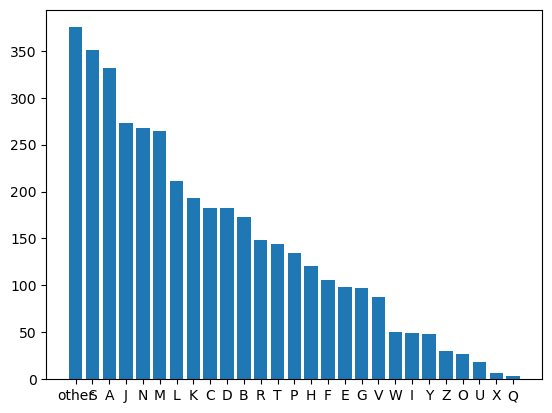

In [178]:
initials = (
    ig_months.name
    .map(get_inicial)
    .value_counts()
    .reset_index(name='frequency')
    .rename(columns={
        'index': 'letter',
        'name': 'letter'
    })
)
plt.bar(initials.letter, initials.frequency)
plt.show()

### ¿Cual es la cuenta de IG con mas caracteres en su nombre?

In [179]:
name_len = (
    ig_months[['name', 'username']]
    .assign(len_name = ig_months.name.map(lambda x: len(str(x))))
    .assign(len_username = ig_months.username.map(lambda x: len(str(x))))
)
ids1 = name_len.loc[name_len.len_name.idxmax()]
ids2 = name_len.loc[name_len.len_username.idxmax()]

**username**

In [180]:
ids2

name                  JUNGKOOK (전정국) Updates
username        jungkook_bighitentertainment
len_name                                  22
len_username                              28
Name: 465, dtype: object

**name**

In [181]:
ids1

name            💓배우 이준기 LEE JOON GI , a.k.a Actor JG 李準基 💓
username                                          actor_jg
len_name                                                42
len_username                                             8
Name: 22, dtype: object

### ¿Cuantas cuentas de Instagram tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?

In [182]:
(ig_months.name.str.contains(r'[GgIiMm]') | ig_months.name.str.contains(r'[GgIiMm]')).sum()

2836

### Defina una métrica que identifique las 10 cuentas mas importantes de Instagram

In [67]:
`engagement_size` es una metrica que toma en cuenta el engagement autentico y la cantidad de followers

,username,followers_jun,authentic_jun,followers_sep,authentic_sep,followers_nov,authentic_nov,followers_dec,authentic_dec
0,433,50700000.0,274900.0,51600000.0,339400.0,51800000.0,402800.0,58200000.0,404800.0
1,____kimwoobin,3600000.0,449400.0,NaN,NaN,3900000.0,452800.0,NaN,NaN
2,__youngbae__,13400000.0,269600.0,13600000.0,331000.0,13800000.0,340200.0,NaN,NaN
3,_agentgirl_,18600000.0,164400.0,NaN,NaN,NaN,NaN,18200000.0,128199.0
4,_hakkencoser_,3500000.0,525100.0,3700000.0,511800.0,3700000.0,500200.0,3900000.0,604800.0
...,...,...,...,...,...,...,...,...,...
1503,viavallen,NaN,NaN,NaN,NaN,NaN,NaN,27800000.0,67900.0
1504,labels.hybe,NaN,NaN,NaN,NaN,NaN,NaN,2300000.0,891100.0
1505,torylanez,NaN,NaN,NaN,NaN,NaN,NaN,11900000.0,85100.0
1506,feat.dino,NaN,NaN,NaN,NaN,NaN,NaN,2700000.0,716600.0


In [183]:
ig_means = (
    ig_means
    .assign(
        engagement_size = (ig_means.authentic / ig_means.followers) * (ig_means.followers / max(ig_means.followers))
    )
    .sort_values(['engagement_size'], ascending=False)
)
ig_means[['username', 'engagement_size']].head(10)

AttributeError: 'DataFrame' object has no attribute 'followers_rate'

### Grafique un histograma del numero de seguidores promedio por pais.

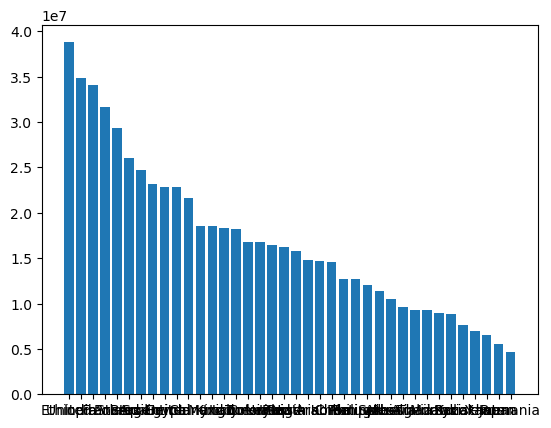

In [184]:
ig_country_means = (
    ig_means
    .merge(ig_months, on='username', how='left')
    [['username', 'country', 'followers_x']]
    .groupby('country')
    .mean('followers_x')
    .reset_index()
    .rename(columns={
        'followers_x': 'mean_followers'
    })
    .sort_values('mean_followers', ascending=False)
)
plt.bar(ig_country_means.country, ig_country_means.mean_followers)
plt.show()

### Cree una serie con todas las categorias existentes en todos los archivos de Instagram.

In [185]:
ig_categories = (ig_months.category1 + ig_months.category2).dropna().drop_duplicates().reset_index(name='category')
ig_categories = list(ig_categories.category)

In [186]:
category_re = r'[A-Z][a-z\s]+[a-z]$'
res = set()
for element in ig_categories:
    has_categories = re.findall(category_re, str(element))
    if has_categories:
        res = res.union(set(has_categories))

ig_categories = pd.Series(list(res))
ig_categories

0          Adult content
1                Gadgets
2                 Luxury
3                 Retail
4              Lifestyle
5                Coaches
6                 Beauty
7                 Family
8     Sports with a ball
9                  Shows
10           Photography
11             Happiness
12            Motorbikes
13               Artists
14               Fashion
15            Journalism
16               Outfits
17             Economics
18                  Toys
19              Modeling
20                Gaming
21                Travel
22         Winter sports
23                Sports
24                   Gym
25          Technologies
26             Marketing
27               Science
28              Politics
29               Careers
30                 Music
dtype: object

### Cree una serie con todos los paises que encuentre en los archivos.

In [187]:
all_countries = ig_months.country.dropna().drop_duplicates()
all_countries

0                      Spain
1                  Indonesia
3                     Russia
4              United States
8                     Brazil
9                     Poland
10               South Korea
20                     India
21                   Morocco
25                    Turkey
33                     Egypt
40                     Chile
45                      Iran
49                     Italy
53                    Mexico
64                  Colombia
67                 Argentina
88                     Japan
96                      Iraq
103           United Kingdom
123              Philippines
128                  Germany
217                  Nigeria
237                   Serbia
263                  Albania
288     United Arab Emirates
409                    China
470                   France
504               Kazakhstan
530                 Thailand
668                    Syria
786                  Algeria
819                 Pakistan
1250                   Yemen
1960          

### Grafique en un histograma el numero de seguidores por categoria.

In [188]:
# ig_category_followers = (
#     all_categories
#     .merge(ig_months, on='categorie', how='left')
#     [['username', 'country', 'followers_x']]
#     .groupby('country')
#     .mean('followers_x')
#     .reset_index()
#     .rename(columns={
#         'followers_x': 'mean_followers'
#     })
#     .sort_values('mean_followers', ascending=False)
# )
# plt.bar(ig_country_means.country, ig_country_means.mean_followers)
# plt.show()

## <u>Leer los datos que en el nombre no contienen mes (resumen):</u></br>

In [189]:
ig_resumen = pd.read_csv('DATA/instagram.csv')
ig_resumen

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,NaN,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,NaN,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,583K,885.5K


In [190]:
tiktok_resumen = pd.read_csv('DATA/tiktok.csv')
tiktok_resumen

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K
...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,4M,2.2M,351.3K,957,195
996,bellaretamosa,bella,5.1M,2.5M,340.4K,901,145
997,tunico80,🌠Antonio Tonon🌠,5.8M,1M,206.8K,2K,2.1K
998,armon.warren,Armoney,1.2M,1.9M,300.8K,904,630


In [191]:
youtube_resumen = pd.read_csv('DATA/youtube.csv')
youtube_resumen

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58


In [ ]:
#hola 